In [1]:
import os
os.chdir('P:\SAMPLE DATA')

FileNotFoundError: [WinError 53] The network path was not found: 'P:\\SAMPLE DATA'

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report, precision_recall_curve
from sklearn.datasets import make_classification

from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
import time
from contextlib import contextmanager

In [2]:
df=pd.read_excel('2018.xlsx')

NameError: name 'pd' is not defined

In [88]:
df.shape

(788955, 13)

In [91]:
df1=df.sample(n=100000)

In [89]:
df.head(10)

,CMemNo,Description,Failed,InvDate,InvPaymentDate,ProdCategory,ProdCode,ProductAreaName,SuppID,InvNet (SUM),Member Type,Town,Member Join Date
0,640071,Building Supplies,NaN,2014-05-06 12:00:00,2018-10-26 12:00:00,Building Materials,BU-GEN,Building Materials,J00015,22.94,Full Plus,Huntingdon,2006-07-01
1,693184,"Yara Extran (33.5%N) 1,000kg bags",NaN,2016-06-22 00:00:00,2018-04-26 00:00:00,Fertiliser,FT-EXTRAN1000,Fertiliser,Y00011,-4524.00,Full,Littleport,1999-01-21
2,663381,Electricity (Non-HH),NaN,2016-07-01 12:00:00,2019-01-26 12:00:00,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,N00034,-1127.10,Full,Bourne,2010-05-05
3,662934,Chafer Liquid Nufol N20,NaN,2016-07-08 00:00:00,2018-04-26 00:00:00,Fertiliser,FT-NUFOL,Fertiliser,Y00011,-1755.00,Agrevise - Full,Banbury,2008-05-21
4,671224,PHOENIX DAKOTA 90/10 BLEND,NaN,2016-09-27 12:00:00,2018-08-26 12:00:00,Seed,SD-RYE,Seed,B00008,4224.00,Waitrose Farming Partnership - Full,Norwich,1971-02-02
5,671244,Misc Rye Seed,NaN,2016-09-27 12:00:00,2018-08-26 12:00:00,Seed,SD-RYE,Seed,B00008,-4224.00,Full,Attleborough,1972-03-28
6,663481,Electricity (Non-HH),NaN,2016-09-28 00:00:00,2018-03-26 00:00:00,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,S00217,-55.61,Orion Farming Group - Associate,Didcot,2010-09-07
7,663129,Miscellaneous Fuel,NaN,2016-09-28 00:00:00,2018-06-26 00:00:00,Liquid,FL-MISC,Liquid Fuel,W00052,-100.00,Full,Kings Lynn,2009-02-13
8,693064,Miscellaneous Fuel,NaN,2016-09-30 00:00:00,2018-03-26 00:00:00,Liquid,FL-MISC,Liquid Fuel,W00052,-200.00,Full,Kings Lynn,1999-08-26
9,665230,Miscellaneous Fuel,NaN,2016-10-06 12:00:00,2018-09-26 12:00:00,Liquid,FL-MISC,Liquid Fuel,W00052,-100.00,Full,Ely,2016-06-08


In [90]:
df.isnull().sum()

CMemNo                   0
Description             19
Failed              783400
InvDate                  0
InvPaymentDate           0
ProdCategory             0
ProdCode                 0
ProductAreaName          0
SuppID                 329
InvNet (SUM)             0
Member Type              0
Town                     0
Member Join Date         0
dtype: int64

In [92]:
df1['Failed']=df1['Failed'].fillna('success')

In [95]:
df1.isnull().sum()

CMemNo               0
Description          1
Failed               0
InvDate              0
InvPaymentDate       0
ProdCategory         0
ProdCode             0
ProductAreaName      0
SuppID              34
InvNet (SUM)         0
Member Type          0
Town                 0
Member Join Date     0
dtype: int64

In [105]:
df1['Failed'].replace({"success":1,"Failed":0}, inplace=True)

In [97]:
df['Failed'].value_counts().unique()

array([5555], dtype=int64)

In [11]:
df1=df.copy()

In [48]:
df1.head()

,CMemNo,Failed,sales,year of joning,month of joining,day of joining,ProdCategory,Member Type,Town
0,640071,1,22.94,2006,7,1,Building Materials,Others,Huntingdon
1,693184,1,-4524.00,1999,1,21,Other products,Full,Other Area
2,663381,1,-1127.10,2010,5,5,"Non HH, mains gas, MOP",Full,Other Area
3,662934,1,-1755.00,2008,5,21,Other products,Others,Other Area
4,671224,1,4224.00,1971,2,2,Other products,Others,Norwich


In [98]:
df1.rename(columns={'InvNet (SUM)':'sales'},inplace=True)

In [99]:
df1['Zerosales'] = (df1.sales == 0).astype(int)

In [100]:
df1['refunded']= (df1.sales < 0).astype(int)

In [16]:
df.head(10)

,CMemNo,Description,Failed,InvDate,InvPaymentDate,ProdCategory,ProdCode,ProductAreaName,SuppID,sales,Member Type,Town,Member Join Date,Zerosales,refunded
0,662914,Monthly Mobile Contract,1,2011-07-25,2016-07-26,Mobile,MS-MOB,Telecoms,O00001,-120.30,Agrevise - Full,Northampton,2008-05-08,0,1
1,662914,Monthly Mobile Contract,1,2011-10-25,2016-07-26,Mobile,MS-MOB,Telecoms,O00001,-73.37,Agrevise - Full,Northampton,2008-05-08,0,1
2,693482,Miscellaneous Items,1,2012-03-01,2017-01-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,King's Lynn,1997-03-20,0,1
3,663686,Miscellaneous Items,1,2012-09-11,2016-06-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,2nd Account,Spalding,2011-06-08,0,1
4,671350,Miscellaneous Items,1,2012-10-19,2016-07-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,Norwich,1990-02-20,0,1
5,693412,Miscellaneous Items,1,2012-11-28,2016-06-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,Fakenham,1994-03-17,0,1
6,693225,Miscellaneous Items,1,2013-01-31,2016-06-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,Kings Lynn,1993-09-20,0,1
7,664339,Miscellaneous Items,1,2013-05-21,2016-06-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Waitrose Farming Partnership - Full,Attleborough,2013-05-08,0,1
8,663201,Miscellaneous Items,1,2013-06-20,2016-05-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,Colchester,2009-06-04,0,1
9,693264,Miscellaneous Items,1,2013-08-16,2016-06-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,Norwich,1966-04-25,0,1


In [19]:
df.groupby('Failed')['refunded'].sum().reset_index()

,Failed,refunded
0,0,73
1,1,25878


In [20]:
df2=df.loc[(df['Failed'] == 0)]

In [21]:
df2.head(10)

,CMemNo,Description,Failed,InvDate,InvPaymentDate,ProdCategory,ProdCode,ProductAreaName,SuppID,sales,Member Type,Town,Member Join Date,Zerosales,refunded
969,662163,Tyres & Valve Hardware,0,2016-01-28,2016-06-26,Tyres,MC-T,Machinery,S00058,80.96,Full,Kings Lynn,2005-07-05,0,0
1041,662163,"Machinery Tools, Vehicle Parts & Spares",0,2016-01-29,2016-06-26,General - Machinery,MC-MS,Machinery,S00058,58.00,Full,Kings Lynn,2005-07-05,0,0
3573,694907,Blended Feed,0,2016-02-03,2016-03-26,Feed,FD-B,Feed & Animal Health & Vets Fees,P00065,3494.08,Associate,Saffron Walden,2015-08-05,0,0
4642,694907,Gas Oil / ULSG,0,2016-02-04,2016-03-31,Liquid,FL-GO,Liquid Fuel,W00052,1052.40,Associate,Saffron Walden,2015-08-05,0,0
4663,693145,"Machinery Tools, Vehicle Parts & Spares",0,2016-02-04,2016-04-26,General - Machinery,MC-MS,Machinery,D00030,892.82,Full,King's Lynn,2002-10-10,0,0
4681,671194,Building Supplies,0,2016-02-04,2016-07-26,Building Materials,BU-GEN,Building Materials,W00139,29.12,Full,Norwich,1990-01-01,0,0
6693,694907,Blended Feed,0,2016-02-08,2016-03-26,Feed,FD-B,Feed & Animal Health & Vets Fees,P00065,3138.96,Associate,Saffron Walden,2015-08-05,0,0
6835,693145,"Machinery Tools, Vehicle Parts & Spares",0,2016-02-08,2016-04-26,General - Machinery,MC-MS,Machinery,D00030,811.23,Full,King's Lynn,2002-10-10,0,0
10859,693145,Horse Feed 20 kg Speedi Beet Horse feed,0,2016-02-11,2016-04-26,Feed,FD-H,Feed & Animal Health & Vets Fees,B00020,196.40,Full,King's Lynn,2002-10-10,0,0
12807,694907,Blended Feed,0,2016-02-12,2016-03-26,Feed,FD-B,Feed & Animal Health & Vets Fees,P00065,3311.58,Associate,Saffron Walden,2015-08-05,0,0


In [22]:
df2.shape

(2395, 15)

In [26]:
df2.CMemNo.unique().shape

(66,)

In [27]:
df2=df.loc[(df['Failed'] == 1)]

In [28]:
df2

,CMemNo,Description,Failed,InvDate,InvPaymentDate,ProdCategory,ProdCode,ProductAreaName,SuppID,sales,Member Type,Town,Member Join Date,Zerosales,refunded
0,662914,Monthly Mobile Contract,1,2011-07-25,2016-07-26,Mobile,MS-MOB,Telecoms,O00001,-120.30,Agrevise - Full,Northampton,2008-05-08,0,1
1,662914,Monthly Mobile Contract,1,2011-10-25,2016-07-26,Mobile,MS-MOB,Telecoms,O00001,-73.37,Agrevise - Full,Northampton,2008-05-08,0,1
2,693482,Miscellaneous Items,1,2012-03-01,2017-01-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,King's Lynn,1997-03-20,0,1
3,663686,Miscellaneous Items,1,2012-09-11,2016-06-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,2nd Account,Spalding,2011-06-08,0,1
4,671350,Miscellaneous Items,1,2012-10-19,2016-07-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,Norwich,1990-02-20,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591928,663975,Propane 13kg,1,2017-12-31,2017-02-26,LPG & Solid fuels,GS-PROP13,LPG & Solid Fuel,C00190,40.80,Full,Ipswich,2012-07-06,0,0
591929,663975,Propane 19kg,1,2017-12-31,2017-02-26,LPG & Solid fuels,GS-PROP19,LPG & Solid Fuel,C00190,20.02,Full,Ipswich,2012-07-06,0,0
591930,663975,Propane 47kg,1,2017-12-31,2017-02-26,LPG & Solid fuels,GS-PROP47,LPG & Solid Fuel,C00190,40.75,Full,Ipswich,2012-07-06,0,0
591931,693468,Delivery charge LPG,1,2017-12-31,2017-02-26,LPG & Solid fuels,GS-DELY,LPG & Solid Fuel,C00190,4.76,Associate,Kings Lynn,1986-02-27,0,0


In [106]:
df1.head()

,CMemNo,Failed,ProdCategory,sales,Member Type,Town,Zerosales,refunded,year of joning,month of joining,day of joining
49225,662636,1,Charge card,1.60,Associate,Stamford,0,0,2007,7,6
705292,663309,1,Tyres,368.00,Full,Fakenham,0,0,2010,2,4
592205,663309,1,Charge card,70.71,Full,Fakenham,0,0,2010,2,4
396622,663353,1,Charge card,8.78,Staff,Norwich,0,0,2010,4,1
445433,693500,1,"Non HH, mains gas, MOP",2.45,Full,Dereham,0,0,1979,9,14


In [101]:
df1.drop(['Description','InvDate','InvPaymentDate','ProductAreaName','SuppID'],axis=1,inplace=True)

In [102]:
#members joined year and month
df1['year of joning']=pd.to_datetime(df1["Member Join Date"], format="%d/%m/%Y").dt.year
df1['month of joining']=pd.to_datetime(df1["Member Join Date"], format="%d/%m/%Y").dt.month
df1['day of joining']=pd.to_datetime(df1["Member Join Date"], format="%d/%m/%Y").dt.day

In [103]:
df1.drop(['ProdCode','Member Join Date'],axis=1,inplace=True)

In [18]:
df1['ProdCategory'].unique()

array(['Building Materials', 'Fertiliser', 'Non HH, mains gas, MOP',
       'Seed', 'Liquid', 'Livestock Products', 'Electricity HH',
       'General - Supplies', 'Mobile', 'Vet fees & Animal Health / Semen',
       'LPG & Solid fuels', 'Accounts', 'Tyres', 'General - Machinery',
       'Feed', 'Agrochemicals', 'Non Levy', 'Hire', 'Insurance',
       'Fuel Cards', 'General Services', 'Hardware', 'Renewable Services',
       'Agrochemicals Non Levy', 'Fixed & Broadband', 'Rodenticides',
       'Liquid 10,000Ltrs+', 'Rebates to Members',
       'General Supplies Non Levy', 'Build Materials Non Levy',
       'Tractor Hire', 'Capital', 'Charge card', 'Seed Non Levy'],
      dtype=object)

In [20]:
from collections import Counter

In [38]:
def cumulatively_categorise(column,threshold=0.60,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
        break
  #Append the category Other to the list
  categories_list.append('Other Area')

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 'Other Area')

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  else:
    return new_column

In [22]:
df2=df1.copy()

In [23]:
#Call the function with a default threshold of 75%
transformed_column,new_category_list=cumulatively_categorise(df1['ProdCategory'],return_categories_list=True)

In [24]:
transformed_column.describe()

count             788955
unique                10
top       Other products
freq              147432
Name: ProdCategory, dtype: object

In [25]:
new_category_list

['General - Machinery',
 'Building Materials',
 'Fuel Cards',
 'Agrochemicals',
 'Fixed & Broadband',
 'Charge card',
 'General - Supplies',
 'Non HH, mains gas, MOP',
 'Mobile',
 'Other products']

In [26]:
new_category_list

['General - Machinery',
 'Building Materials',
 'Fuel Cards',
 'Agrochemicals',
 'Fixed & Broadband',
 'Charge card',
 'General - Supplies',
 'Non HH, mains gas, MOP',
 'Mobile',
 'Other products']

In [27]:
transformed_column.head()

0        Building Materials
1            Other products
2    Non HH, mains gas, MOP
3            Other products
4            Other products
Name: ProdCategory, dtype: object

In [28]:
df1.drop('ProdCategory',axis=1,inplace=True)

In [29]:
df1=pd.concat([df1,transformed_column],axis=1)

In [30]:
df1.head(10)

,CMemNo,Failed,sales,Member Type,Town,year of joning,month of joining,day of joining,ProdCategory
0,640071,1,22.94,Full Plus,Huntingdon,2006,7,1,Building Materials
1,693184,1,-4524.00,Full,Littleport,1999,1,21,Other products
2,663381,1,-1127.10,Full,Bourne,2010,5,5,"Non HH, mains gas, MOP"
3,662934,1,-1755.00,Agrevise - Full,Banbury,2008,5,21,Other products
4,671224,1,4224.00,Waitrose Farming Partnership - Full,Norwich,1971,2,2,Other products
5,671244,1,-4224.00,Full,Attleborough,1972,3,28,Other products
6,663481,1,-55.61,Orion Farming Group - Associate,Didcot,2010,9,7,"Non HH, mains gas, MOP"
7,663129,1,-100.00,Full,Kings Lynn,2009,2,13,Other products
8,693064,1,-200.00,Full,Kings Lynn,1999,8,26,Other products
9,665230,1,-100.00,Full,Ely,2016,6,8,Other products


In [32]:
transformed_column,new_category_list=cumulatively_categorise(df1['Member Type'],return_categories_list=True)

In [33]:
transformed_column.describe()

count     788955
unique         4
top         Full
freq      468698
Name: Member Type, dtype: object

In [34]:
transformed_column.unique()

array(['Others', 'Full', 'Associate', '2nd Account'], dtype=object)

In [35]:
df1.drop('Member Type',axis=1,inplace=True)

In [36]:
df1=pd.concat([df1,transformed_column],axis=1)

In [37]:
df1.head()

,CMemNo,Failed,sales,Town,year of joning,month of joining,day of joining,ProdCategory,Member Type
0,640071,1,22.94,Huntingdon,2006,7,1,Building Materials,Others
1,693184,1,-4524.00,Littleport,1999,1,21,Other products,Full
2,663381,1,-1127.10,Bourne,2010,5,5,"Non HH, mains gas, MOP",Full
3,662934,1,-1755.00,Banbury,2008,5,21,Other products,Others
4,671224,1,4224.00,Norwich,1971,2,2,Other products,Others


In [39]:
transformed_column,new_category_list=cumulatively_categorise(df1['Town'],return_categories_list=True)

In [40]:
transformed_column.describe()

count         788955
unique            19
top       Other Area
freq          310728
Name: Town, dtype: object

In [41]:
df1.drop('Town',axis=1,inplace=True)

In [42]:
df1=pd.concat([df1,transformed_column],axis=1)

In [52]:
df1.head()

,CMemNo,Failed,sales,year of joning,month of joining,day of joining,ProdCategory,Member Type,Town,Zerosales,refunded
0,640071,1,22.94,2006,7,1,Building Materials,Others,Huntingdon,0,0
1,693184,1,-4524.00,1999,1,21,Other products,Full,Other Area,0,1
2,663381,1,-1127.10,2010,5,5,"Non HH, mains gas, MOP",Full,Other Area,0,1
3,662934,1,-1755.00,2008,5,21,Other products,Others,Other Area,0,1
4,671224,1,4224.00,1971,2,2,Other products,Others,Norwich,0,0


In [47]:
df1.shape

(788955, 11)

In [48]:
df1.isnull().sum()

CMemNo              0
Failed              0
InvNet (SUM)        0
year of joning      0
month of joining    0
day of joining      0
ProdCategory        0
Member Type         0
Town                0
Zerosales           0
refunded            0
dtype: int64

In [54]:
#df1=df1.fillna(0)

In [53]:
df1['ProdCategory'].unique()

array(['Building Materials', 'Other products', 'Non HH, mains gas, MOP',
       'General - Supplies', 'Mobile', 'General - Machinery',
       'Agrochemicals', 'Fuel Cards', 'Fixed & Broadband', 'Charge card'],
      dtype=object)

In [54]:
df1['Member Type'].unique()

array(['Others', 'Full', 'Associate', '2nd Account'], dtype=object)

In [55]:
df1['Town'].unique()

array(['Huntingdon', 'Other Area', 'Norwich', 'Attleborough',
       'Kings Lynn', 'Ely', 'Gt Yarmouth', 'Wisbech', 'Dereham', 'Diss',
       "King's Lynn", 'Thetford', 'Great Yarmouth', 'Fakenham', 'Beccles',
       'North Walsham', 'Holt', 'Peterborough', 'Wymondham'], dtype=object)

In [56]:
categoricals = ['ProdCategory', 'Member Type','Town']
ohe = OneHotEncoder(sparse=False)
cat_matrix_train = ohe.fit_transform(df1.loc[:, categoricals])
data_ohe = pd.DataFrame(cat_matrix_train,
                           columns=ohe.get_feature_names(categoricals), 
                           index=df1.index)
data_ohe.columns = ['Building Materials', 'Other products', 'Non HH, mains gas, MOP',
       'General - Supplies', 'Mobile', 'General - Machinery',
       'Agrochemicals', 'Fuel Cards', 'Fixed & Broadband', 'Charge card','Others', 'Full', 'Associate', '2nd Account',
                   'Huntingdon', 'Other Area', 'Norwich', 'Attleborough',
       'Kings Lynn', 'Ely', 'Gt Yarmouth', 'Wisbech', 'Dereham', 'Diss',
       "King's Lynn", 'Thetford', 'Great Yarmouth', 'Fakenham', 'Beccles',
       'North Walsham', 'Holt', 'Peterborough', 'Wymondham']
df1 = pd.concat([df1, data_ohe], axis=1)
df1.head(10)

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,CMemNo,Failed,sales,year of joning,month of joining,day of joining,ProdCategory,Member Type,Town,Zerosales,...,Diss,King's Lynn,Thetford,Great Yarmouth,Fakenham,Beccles,North Walsham,Holt,Peterborough,Wymondham
0,640071,1,22.94,2006,7,1,Building Materials,Others,Huntingdon,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,693184,1,-4524.00,1999,1,21,Other products,Full,Other Area,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,663381,1,-1127.10,2010,5,5,"Non HH, mains gas, MOP",Full,Other Area,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,662934,1,-1755.00,2008,5,21,Other products,Others,Other Area,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,671224,1,4224.00,1971,2,2,Other products,Others,Norwich,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,671244,1,-4224.00,1972,3,28,Other products,Full,Attleborough,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,663481,1,-55.61,2010,9,7,"Non HH, mains gas, MOP",Others,Other Area,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,663129,1,-100.00,2009,2,13,Other products,Full,Kings Lynn,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,693064,1,-200.00,1999,8,26,Other products,Full,Kings Lynn,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,665230,1,-100.00,2016,6,8,Other products,Full,Ely,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
df1.drop(['ProdCategory','Member Type','Town'],axis=1,inplace=True)

In [58]:
df1.head(5)

,CMemNo,Failed,sales,year of joning,month of joining,day of joining,Zerosales,refunded,Building Materials,Other products,...,Diss,King's Lynn,Thetford,Great Yarmouth,Fakenham,Beccles,North Walsham,Holt,Peterborough,Wymondham
0,640071,1,22.94,2006,7,1,0,0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,693184,1,-4524.00,1999,1,21,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,663381,1,-1127.10,2010,5,5,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,662934,1,-1755.00,2008,5,21,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,671224,1,4224.00,1971,2,2,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [55]:
df1.dtypes

CMemNo                      int64
Failed                      int64
InvNet (SUM)              float64
year of joning              int64
month of joining            int64
day of joining              int64
Zerosales                   int32
refunded                    int32
Building Materials        float64
Other products            float64
Non HH, mains gas, MOP    float64
General - Supplies        float64
Mobile                    float64
General - Machinery       float64
Agrochemicals             float64
Fuel Cards                float64
Fixed & Broadband         float64
Charge card               float64
Others                    float64
Full                      float64
Associate                 float64
2nd Account               float64
Huntingdon                float64
Other Area                float64
Norwich                   float64
Attleborough              float64
Kings Lynn                float64
Ely                       float64
Gt Yarmouth               float64
Wisbech       

In [59]:
df1.columns

Index(['CMemNo', 'Failed', 'sales', 'year of joning', 'month of joining',
       'day of joining', 'Zerosales', 'refunded', 'Building Materials',
       'Other products', 'Non HH, mains gas, MOP', 'General - Supplies',
       'Mobile', 'General - Machinery', 'Agrochemicals', 'Fuel Cards',
       'Fixed & Broadband', 'Charge card', 'Others', 'Full', 'Associate',
       '2nd Account', 'Huntingdon', 'Other Area', 'Norwich', 'Attleborough',
       'Kings Lynn', 'Ely', 'Gt Yarmouth', 'Wisbech', 'Dereham', 'Diss',
       'King's Lynn', 'Thetford', 'Great Yarmouth', 'Fakenham', 'Beccles',
       'North Walsham', 'Holt', 'Peterborough', 'Wymondham'],
      dtype='object')

In [60]:
df2=df1.copy()

In [61]:
df1.shape

(788955, 41)

In [62]:
df3=df2['sales']

In [63]:
df1=df1.loc[:, df1.columns != 'sales'].astype(int)

In [64]:
df1

,CMemNo,Failed,year of joning,month of joining,day of joining,Zerosales,refunded,Building Materials,Other products,"Non HH, mains gas, MOP",...,Diss,King's Lynn,Thetford,Great Yarmouth,Fakenham,Beccles,North Walsham,Holt,Peterborough,Wymondham
0,640071,1,2006,7,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,693184,1,1999,1,21,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,663381,1,2010,5,5,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,662934,1,2008,5,21,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,671224,1,1971,2,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788950,693352,1,1977,2,24,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
788951,671555,1,1990,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
788952,693468,1,1986,2,27,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
788953,671223,1,1995,7,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [65]:
df1=pd.concat([df1,df3],axis=1)

,CMemNo,Failed,year of joning,month of joining,day of joining,Zerosales,refunded,Building Materials,Other products,"Non HH, mains gas, MOP",...,King's Lynn,Thetford,Great Yarmouth,Fakenham,Beccles,North Walsham,Holt,Peterborough,Wymondham,sales
CMemNo,1.000000,0.013371,-0.459597,-0.027884,0.221657,-0.004473,-0.011308,-0.007538,0.018090,-0.009425,...,0.074197,0.105389,0.008672,0.106513,-0.299004,-0.026140,0.095949,-0.026222,0.045701,-0.016889
Failed,0.013371,1.000000,-0.044701,0.018009,0.019245,0.002330,0.002650,0.002137,0.007770,-0.034861,...,-0.012890,-0.002442,0.009652,0.005438,0.002414,-0.019469,-0.001449,-0.008921,0.007691,-0.002063
year of joning,-0.459597,-0.044701,1.000000,0.060343,-0.220400,0.011063,-0.007162,-0.048459,-0.009764,0.068250,...,-0.000362,-0.039751,-0.071191,-0.205493,0.336759,0.069085,-0.091306,0.066980,-0.091957,0.008783
month of joining,-0.027884,0.018009,0.060343,1.000000,0.071755,0.003656,0.003093,0.008913,0.006020,-0.016864,...,0.004704,0.021813,-0.017881,-0.103142,0.065086,0.006988,0.007323,-0.003331,0.003827,-0.000269
day of joining,0.221657,0.019245,-0.220400,0.071755,1.000000,-0.000280,-0.000329,-0.003813,-0.005733,-0.017331,...,0.064941,0.053336,-0.012350,-0.019448,-0.104350,-0.004865,0.076529,0.001756,0.030212,-0.008992
Zerosales,-0.004473,0.002330,0.011063,0.003656,-0.000280,1.000000,-0.025168,-0.034755,-0.025065,-0.028690,...,-0.004270,-0.002871,-0.000336,-0.003096,0.003203,0.005265,0.007666,0.004473,-0.000739,-0.027852
refunded,-0.011308,0.002650,-0.007162,0.003093,-0.000329,-0.025168,1.000000,0.040105,-0.041058,-0.040526,...,0.000098,-0.000379,-0.000244,-0.001304,0.004922,0.003674,0.002086,0.003451,-0.002157,-0.110232
Building Materials,-0.007538,0.002137,-0.048459,0.008913,-0.003813,-0.034755,0.040105,1.000000,-0.128189,-0.092628,...,0.011229,0.004296,-0.001234,0.006480,-0.017709,0.019192,0.015824,0.004161,-0.007150,0.066395
Other products,0.018090,0.007770,-0.009764,0.006020,-0.005733,-0.025065,-0.041058,-0.128189,1.000000,-0.111276,...,-0.011255,0.017436,0.013180,0.007875,-0.041823,-0.005075,-0.003979,-0.010228,0.023520,-0.059257
"Non HH, mains gas, MOP",-0.009425,-0.034861,0.068250,-0.016864,-0.017331,-0.028690,-0.040526,-0.092628,-0.111276,1.000000,...,-0.001790,-0.021415,-0.001073,0.000102,0.013115,0.035313,-0.016374,-0.015486,0.002139,-0.040770


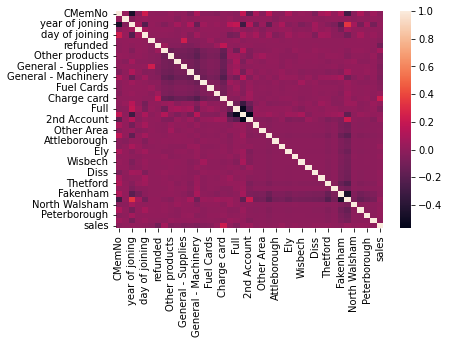

<Figure size 1440x1152 with 0 Axes>

In [69]:
sns.heatmap(df1
            .corr())
plt.figure(figsize=(20, 16))
df1.corr()

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Failed', ylabel='count'>

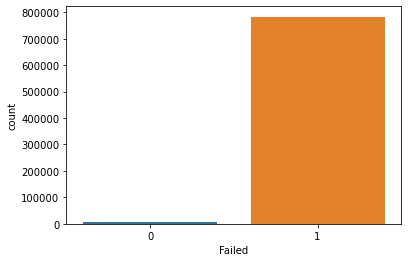

In [70]:
sns.countplot(df1.Failed)

In [ ]:
#plot churned clients by gender

plt.figure(figsize=(15, 8))
sns.countplot(df1.ProductAreaName, hue = df1.Failed)
plt.ylabel('Count', fontsize=30)
plt.xlabel('ProductAreaName', fontsize = 30)
plt.title("Churned Clients by ProductAreaName", fontsize = 35)
plt.legend(labels=['Stayed', 'Churned'], bbox_to_anchor=(1, 1), fontsize= 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tight_layout()
sns.despine()

In [66]:
df1.columns

Index(['CMemNo', 'Failed', 'year of joning', 'month of joining',
       'day of joining', 'Zerosales', 'refunded', 'Building Materials',
       'Other products', 'Non HH, mains gas, MOP', 'General - Supplies',
       'Mobile', 'General - Machinery', 'Agrochemicals', 'Fuel Cards',
       'Fixed & Broadband', 'Charge card', 'Others', 'Full', 'Associate',
       '2nd Account', 'Huntingdon', 'Other Area', 'Norwich', 'Attleborough',
       'Kings Lynn', 'Ely', 'Gt Yarmouth', 'Wisbech', 'Dereham', 'Diss',
       'King's Lynn', 'Thetford', 'Great Yarmouth', 'Fakenham', 'Beccles',
       'North Walsham', 'Holt', 'Peterborough', 'Wymondham', 'sales'],
      dtype='object')

In [68]:
features =['CMemNo','year of joning', 'month of joining',
       'day of joining', 'Zerosales', 'refunded', 'Building Materials',
       'Other products', 'Non HH, mains gas, MOP', 'General - Supplies',
       'Mobile', 'General - Machinery', 'Agrochemicals', 'Fuel Cards',
       'Fixed & Broadband', 'Charge card', 'Others', 'Full', 'Associate',
       '2nd Account', 'Huntingdon', 'Other Area', 'Norwich', 'Attleborough',
       'Kings Lynn', 'Ely', 'Gt Yarmouth', 'Wisbech', 'Dereham', 'Diss',
       "King's Lynn", 'Thetford', 'Great Yarmouth', 'Fakenham', 'Beccles',
       'North Walsham', 'Holt', 'Peterborough', 'Wymondham', 'sales']

X = df1.loc[:, features]
y = df1.loc[:, 'Failed']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = .2, random_state = 4444)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = .25, random_state = 4444)

X_train.drop('CMemNo', axis = 1, inplace = True)
X_val.drop('CMemNo', axis = 1, inplace = True)

In [69]:
# check version number
import imblearn
print(imblearn.__version__)

0.9.1


In [70]:
#Oversample minority class
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=4444)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)

In [71]:
X_train

,year of joning,month of joining,day of joining,Zerosales,refunded,Building Materials,Other products,"Non HH, mains gas, MOP",General - Supplies,Mobile,...,King's Lynn,Thetford,Great Yarmouth,Fakenham,Beccles,North Walsham,Holt,Peterborough,Wymondham,sales
547216,2006,6,7,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,108.00
430563,2014,4,2,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,180.00
333481,1990,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,160.00
488847,1967,7,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.29
136458,1990,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,160.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63641,2000,4,10,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,20.00
351386,1997,3,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.96
331772,2016,5,11,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,144.54
146371,1997,3,6,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-56.25


In [72]:
#logistic regression
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_resampled)
X_val_scaled = ss.transform(X_val)
lr = LogisticRegression()
lr.fit(X_train_scaled, y_resampled)
y_preds_lr = lr.predict(X_val_scaled)
print(classification_report(y_test, y_preds_lr))

              precision    recall  f1-score   support

           0       0.01      0.35      0.01      1130
           1       0.99      0.65      0.78    156661

    accuracy                           0.64    157791
   macro avg       0.50      0.50      0.40    157791
weighted avg       0.99      0.64      0.78    157791



In [74]:
#save test set as CSV for streamlit app
sample = X_train_val
sample.to_csv(path_or_buf = 'stestreaaaamey.csv', index = False)

In [75]:
import pickle
from sklearn.metrics import fbeta_score, precision_score

              precision    recall  f1-score   support

           0       0.02      0.83      0.05      1098
           1       1.00      0.77      0.87    156693

    accuracy                           0.77    157791
   macro avg       0.51      0.80      0.46    157791
weighted avg       0.99      0.77      0.86    157791

0.01


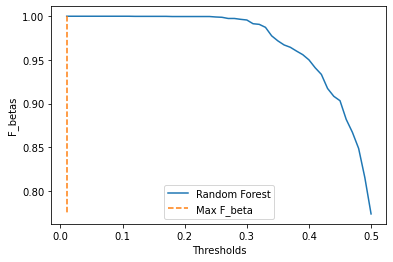

In [78]:
# first random forest model, with fBeta curve where beta=5
rfc = RandomForestClassifier(n_estimators = 9, max_depth = 6, random_state = 4444)
rfc.fit(X_resampled, y_resampled)
y_preds_rfc = rfc.predict(X_val)

pickle.dump(rfc, open( "ran_forestiny_mo.p", "wb" ) )
print(classification_report(y_val, y_preds_rfc))

f_betas = []
f_max = 0
t_max = 0
for t in np.arange(1, 51)/100:
    predicted_proba = rfc.predict_proba(X_val)
    predicted = (predicted_proba[:,1] >= t).astype('int')
    f_beta = fbeta_score(y_val, predicted, beta = 5)
    f_betas.append(f_beta)
    if f_beta > f_max:
        f_max = f_beta
        max_t = t
print(max_t)
plt.plot(np.arange(1, 51)/100, f_betas, label = 'Random Forest')  
plt.plot([max_t]*len(f_betas), f_betas, linestyle='--', label = 'Max F_beta')
plt.xlabel('Thresholds')
plt.ylabel('F_betas')
plt.legend()

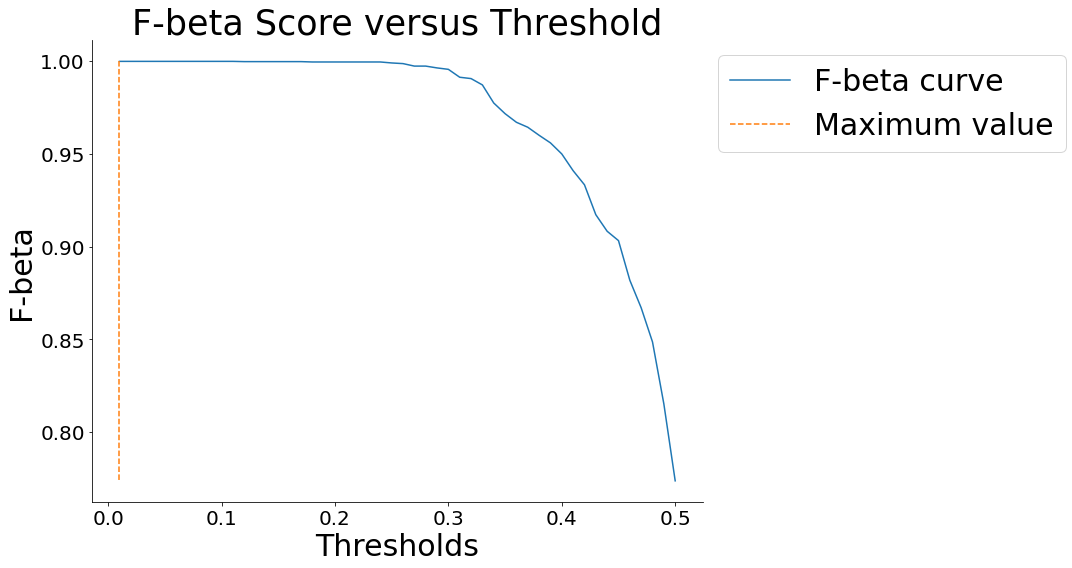

In [79]:
# larger f_beta graph
plt.figure(figsize=(15, 8))
plt.plot(np.arange(1, 51)/100, f_betas, label = 'Random Forest')  
plt.plot([max_t]*len(f_betas), f_betas, linestyle='--', label = 'Max F_beta')
plt.xlabel('Thresholds', fontsize = 30)
plt.ylabel('F-beta', fontsize = 30)
plt.legend(labels=['F-beta curve', 'Maximum value'], bbox_to_anchor=(1, 1), fontsize= 30)

plt.title("F-beta Score versus Threshold", fontsize = 35)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tight_layout()
sns.despine()
plt.savefig('fbetaplot.png')

Text(0, 0.5, 'Precision')

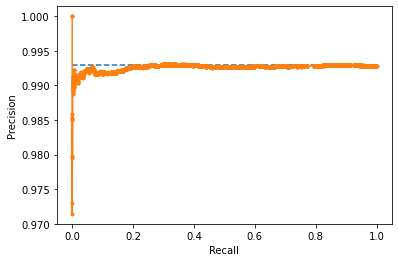

In [80]:
# precision recall curve
pos_probs = predicted_proba[:, 1]
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')

In [ ]:
#use grid search CV to find best parameters for Random Forest Classifier
cv_result = {}
best_estimators = {}
best_params = {}
    
clf = GridSearchCV(RandomForestClassifier(), 
                   param_grid = {"max_features": ["log2","Auto","None"],
                 "min_samples_split":[2,3,5],
                 "min_samples_leaf":[1,3,5],
                 "bootstrap":[True,False],
                 "n_estimators":[5, 10, 50,100,150],
                 'max_depth' : [3, 5, 7, 9],
                 "criterion":["gini","entropy"]},
                   cv =10, scoring = 'f1', 
                   n_jobs = -1, 
                   verbose = False)

clf.fit(X_resampled,y_resampled)
cv_result = clf.best_score_
best_estimators = clf.best_estimator_
best_params = clf.best_params_

In [91]:
print(best_params)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}


In [92]:
y_pred =  best_estimators.fit(X_resampled,y_resampled).predict(X_val)

F1S=accuracy_score(y_pred, y_val)

print('f1 score :', "%.3f" %F1S)

f1 score : 0.935


In [93]:
from sklearn import preprocessing

In [94]:
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.58      0.04      0.08       659
           1       0.94      1.00      0.97      9341

    accuracy                           0.93     10000
   macro avg       0.76      0.52      0.52     10000
weighted avg       0.91      0.93      0.91     10000



The threshold with highest F-beta is:  0.01
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       1.00      1.00      1.00      9952

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.99      1.00      0.99     10000



C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.15

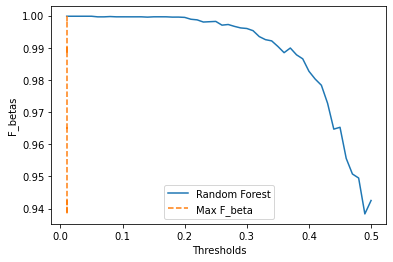

In [95]:
f_betas = []
f_max = 0
t_max = 0
for t in np.arange(1, 51)/100:
    predicted_proba = best_estimators.fit(X_resampled,y_resampled).predict_proba(X_val)
    predicted = (predicted_proba[:,1] >= t).astype('int')
    f_beta = fbeta_score(y_val, predicted, beta = 5)
    f_betas.append(f_beta)
    if f_beta > f_max:
        f_max = f_beta
        max_t = t
print('The threshold with highest F-beta is: ', max_t)
print(classification_report(y_val, (predicted_proba[:,1] >= max_t).astype('int')))
plt.plot(np.arange(1, 51)/100, f_betas, label = 'Random Forest')  
plt.plot([max_t]*len(f_betas), f_betas, linestyle='--', label = 'Max F_beta')
plt.xlabel('Thresholds')
plt.ylabel('F_betas')
plt.legend()

pickle.dump(best_estimators.fit(X_resampled,y_resampled), open( "ran_forestry_mod.p", "wb" ) )
0.15